In [2]:
# imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm
import matplotlib.image as mpimg

In [3]:
# dataset values
datasets = ["Curated Covid CT", "COVID-CT", "COVID-CTset", "SARS-COV-2", "COVID-19 CAD"]
covid_samples = [7593, 349, 15589, 1252, 7644]
non_covid_samples = [6893, 463, 48260, 1230, 2509]
total_samples = [x+y for (x,y) in zip(covid_samples, non_covid_samples)]

color_palette = ['#4c90ba', '#2cc2c2', '#f4b710', '#de663f', '#ff912b']

/var/folders/8x/z_fpqppj6qq5h1gr3s587g2r0000gn/T/ipykernel_7331/3377124946.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(ax, labels=["covid", "non-covid"],


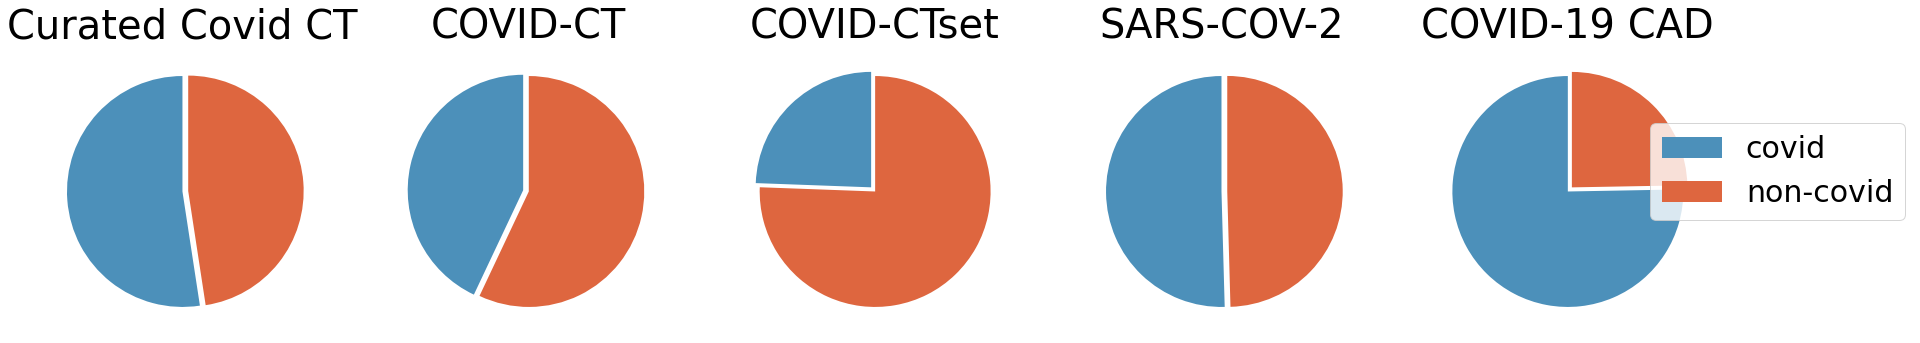

In [20]:
# balance
fig, ax = plt.subplots(1, len(datasets), figsize=(30,30))

legend = []
for i in range(len(datasets)):
    values = [covid_samples[i], non_covid_samples[i]]
    
    labels = ["covid", "non-covid"]
    if (values[0] < values[1]):
        myexplode = [0.05, 0]
    else:
        myexplode = [0, 0.05]

    ax[i].pie(values, startangle=90, colors=[color_palette[0], color_palette[3]], explode=myexplode)
    ax[i].set_title(datasets[i], fontsize=40)
    
    if (i==0):
        legend.append(ax[i])
    #ax[i].legend(["covid", "non-covid"])
    
fig.legend(ax, labels=["covid", "non-covid"],
           loc="center right", fontsize=30)

plt.show()

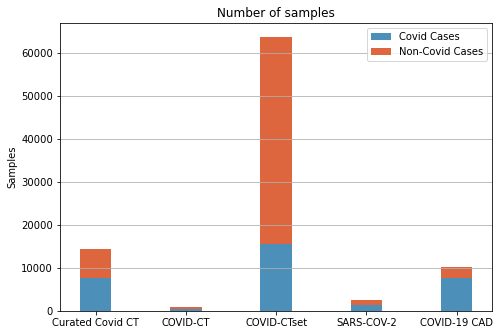

In [21]:
# number of samples
N = 5
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, covid_samples, width, color=color_palette[0])
ax.bar(ind, non_covid_samples, width, bottom=covid_samples, color=color_palette[3])
ax.set_ylabel('Samples')
ax.set_title('Number of samples')
ax.set_xticks(ind, [i for i in datasets])
#ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Covid Cases', 'Non-Covid Cases'])
plt.grid(axis='y')
plt.show()

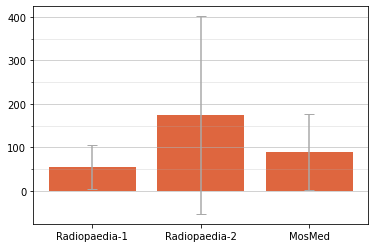

In [25]:
# number of connected components
means = [55.0, 174.05, 89.98]
stds = [49.78, 227.20, 87.10]
dataset_names = ["Radiopaedia-1", "Radiopaedia-2", "MosMed"]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.set_yticks(np.arange(0, 400, 50), minor=True)
ax.bar(dataset_names, means, yerr=stds, capsize=5, color=color_palette[3], ecolor="darkgrey")
ax.grid(axis='y', which="major", alpha=0.7)
ax.grid(axis='y', which="minor", alpha=0.3)
plt.show()

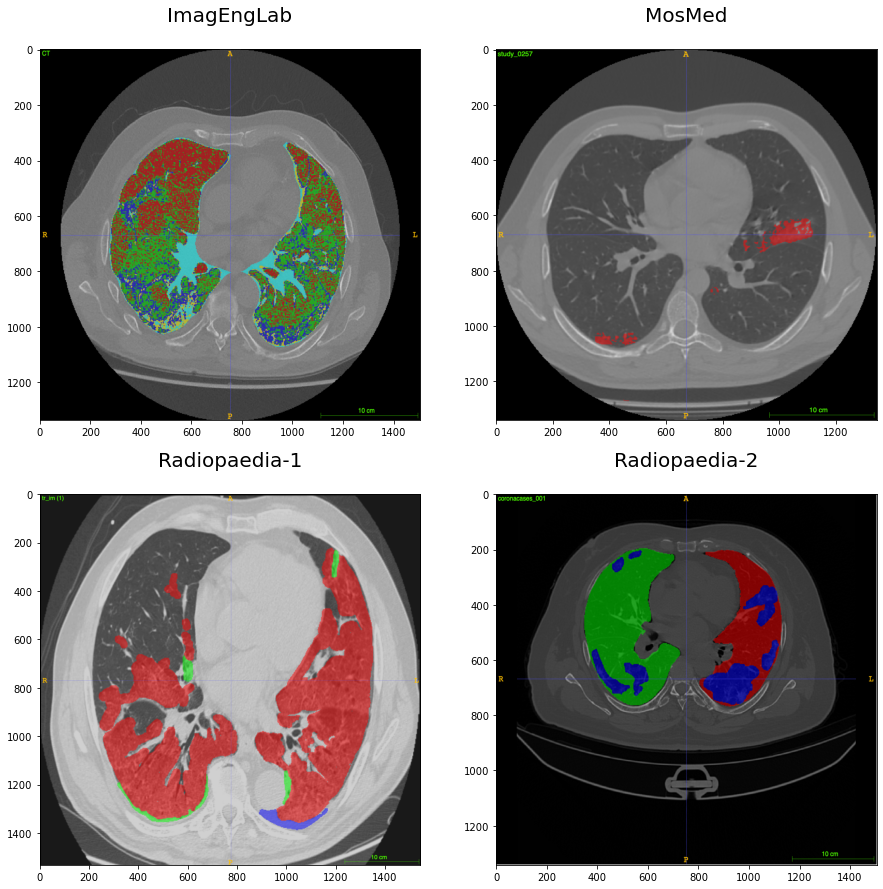

In [27]:
# segmentation images
iel_path = "/Users/danieljeckel/Downloads/ImagEngLab.png"
mosmed_path = "/Users/danieljeckel/Downloads/MosMed.png"
rp_path = "/Users/danieljeckel/Downloads/Radiopaedia.png"
z_path = "/Users/danieljeckel/Downloads/Zenodo.png"

iel = mpimg.imread(iel_path)
mosmed = mpimg.imread(mosmed_path)
rp = mpimg.imread(rp_path)
z = mpimg.imread(z_path)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
imgplot = plt.imshow(iel, aspect="auto")
ax.set_title("ImagEngLab\n", fontsize=20)
ax = fig.add_subplot(2,2,2)
imgplot = plt.imshow(mosmed, aspect="auto")
ax.set_title("MosMed\n", fontsize=20)
ax = fig.add_subplot(2,2,3)
imgplot = plt.imshow(rp, aspect="auto")
ax.set_title("Radiopaedia-1\n", fontsize=20)
ax = fig.add_subplot(2,2,4)
imgplot = plt.imshow(z, aspect="auto")
ax.set_title("Radiopaedia-2\n", fontsize=20)
plt.savefig("segmentation-images.png")